<a href="https://colab.research.google.com/github/abd-arun/machine_learning/blob/main/Bonus_KNN_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
# Step 1: Load and Preprocess Data
iris = load_iris()
data = iris.data
labels = iris.target

# Normalize dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [3]:
# Step 2: Implement KNN Algorithm from Scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p=3):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

class KNN_Custom:
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        if self.metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        else:
            distances = [minkowski_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [4]:
# Step 3: Find the Optimal K
k_values = range(1, 21)
k_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())

best_k = k_values[np.argmax(k_scores)]
print(f"Optimal K found via cross-validation: {best_k}")

Optimal K found via cross-validation: 10


In [5]:
# Step 4: Train and Evaluate Custom KNN
knn_custom = KNN_Custom(k=best_k)
knn_custom.fit(X_train, y_train)
y_pred_custom = knn_custom.predict(X_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Custom KNN Accuracy: {custom_accuracy:.2f}")

Custom KNN Accuracy: 1.00


In [6]:
# Step 5: Compare with Scikit-Learn KNN
knn_sklearn = KNeighborsClassifier(n_neighbors=best_k)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn KNN Accuracy: {sklearn_accuracy:.2f}")

Scikit-Learn KNN Accuracy: 1.00


In [7]:
# Step 6: Save Comparison Report
report = f"Custom KNN Accuracy: {custom_accuracy:.2f}\nScikit-Learn KNN Accuracy: {sklearn_accuracy:.2f}\nOptimal K: {best_k}"
with open("accuracy_comparison_report.txt", "w") as f:
    f.write(report)

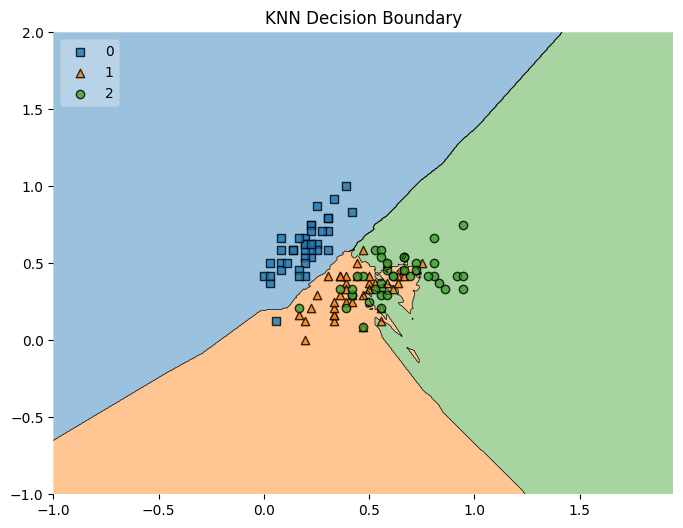

In [8]:
# Step 7: Visualizing Decision Boundaries
# Use only first two features for visualization
X_vis = X_train[:, :2]
y_vis = y_train

# Train a new KNN model with 2 features
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_vis)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(X_vis, y_vis, clf=knn_vis, legend=2)
plt.title("KNN Decision Boundary")
plt.show()
